# Analyse des détails de paiement des clients

Cette notebook analyse les détails des paiements pour chaque client sur la plateforme Olist, y compris le montant total payé et les méthodes de paiement utilisées.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurer le style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Charger les données
file_path = '../reports/cte/order_and_customer_payment_details.csv'
df = pd.read_csv(file_path)

print(f"Nombre de commandes: {len(df)}")
print(f"Nombre de clients: {df['customer_unique_id'].nunique()}")
print(f"Montant total des paiements: {df['order_payment_amount'].sum():.2f} R$")
print(f"Montant moyen par commande: {df['order_payment_amount'].mean():.2f} R$")

# Afficher les premières lignes
df.head()

Nombre de commandes: 101685
Nombre de clients: 96094
Montant total des paiements: 16008794.39 R$
Montant moyen par commande: 157.44 R$


,customer_unique_id,order_id,order_payment_amount,avg_order_amount,payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,141.90,141.90,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,27.19,27.19,credit_card
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,86.22,86.22,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,43.62,43.62,credit_card
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,196.89,196.89,credit_card


Répartition des méthodes de paiement:
payment_type
credit_card    76505
boleto         19783
voucher         3869
debit_card      1528
Name: count, dtype: int64


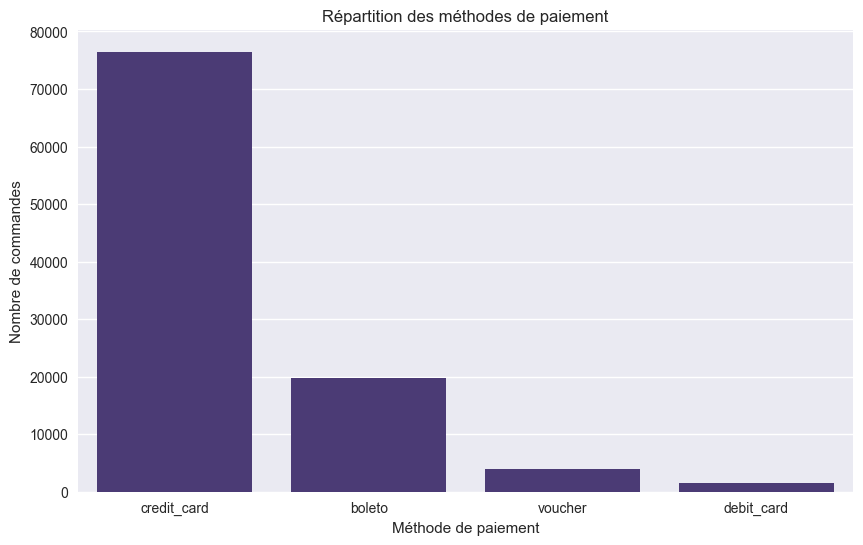


Montant total des paiements par client:
customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13664.08
46450c74a0d8c5ca9395da1daac6c120     9553.02
da122df9eeddfedc1dc1f5349a1a690c     7571.63
763c8b1c9c68a0229c42c9fc6f662b93     7274.88
dc4802a71eae9be1dd28f5d788ceb526     6929.31
459bef486812aa25204be022145caa62     6922.21
ff4159b92c40ebe40454e3e6a7c35ed6     6726.66
4007669dec559734d6f53e029e360987     6081.54
5d0a2980b292d049061542014e8960bf     4809.44
eebb5dda148d3893cdaf5b5ca3040ccb     4764.34
Name: order_payment_amount, dtype: float64


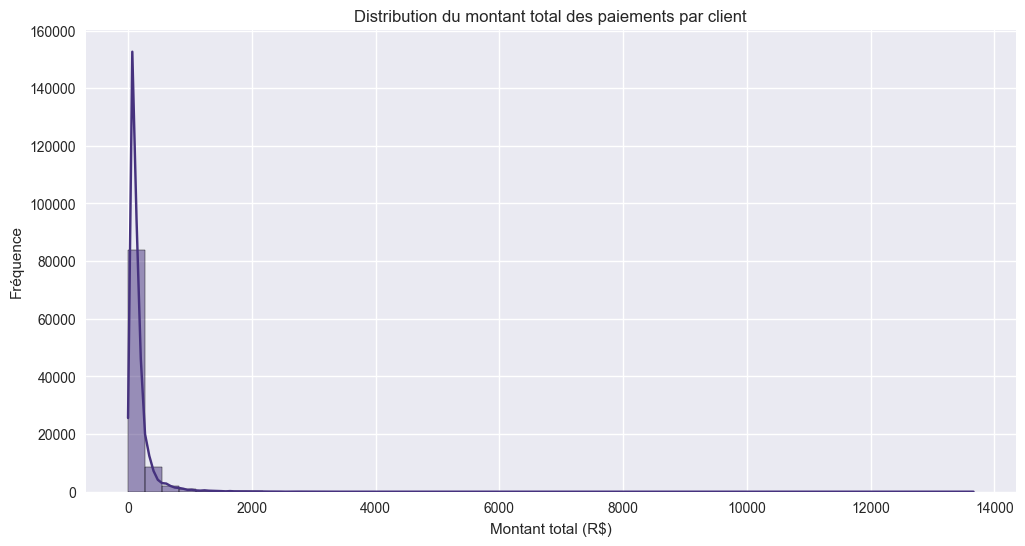


Nombre de commandes par client:
customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     8
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
63cfc61cee11cbe306bff5857d00bfe4     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
738ffcf1017b584e9d2684b36e07469c     6
dc813062e0fc23409cd255f7f53c7074     6
Name: count, dtype: int64


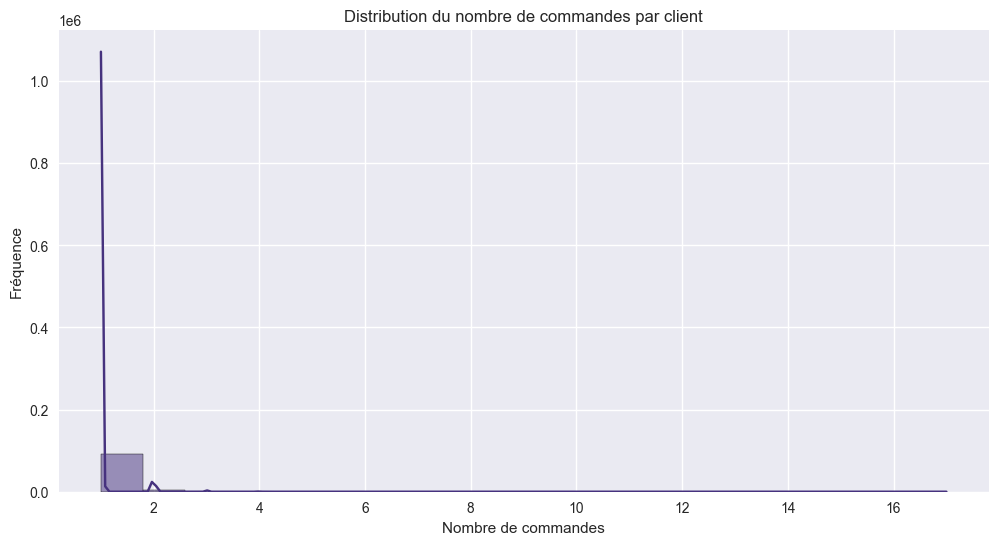

In [2]:
# Analyser les méthodes de paiement
payment_methods = df['payment_type'].value_counts()
print("Répartition des méthodes de paiement:")
print(payment_methods)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.index, y=payment_methods.values)
plt.title('Répartition des méthodes de paiement')
plt.xlabel('Méthode de paiement')
plt.ylabel('Nombre de commandes')
plt.show()

# Analyser le montant total des paiements par client
customer_total_payment = df.groupby('customer_unique_id')['order_payment_amount'].sum().sort_values(ascending=False)
print(f"\nMontant total des paiements par client:")
print(customer_total_payment.head(10))

plt.figure(figsize=(12, 6))
sns.histplot(customer_total_payment, kde=True, bins=50)
plt.title('Distribution du montant total des paiements par client')
plt.xlabel('Montant total (R$)')
plt.ylabel('Fréquence')
plt.show()

# Analyser le nombre de commandes par client
customer_order_count = df['customer_unique_id'].value_counts()
print(f"\nNombre de commandes par client:")
print(customer_order_count.head(10))

plt.figure(figsize=(12, 6))
sns.histplot(customer_order_count, kde=True, bins=20)
plt.title('Distribution du nombre de commandes par client')
plt.xlabel('Nombre de commandes')
plt.ylabel('Fréquence')
plt.show()

Montant moyen par commande par client:
customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13664.08
763c8b1c9c68a0229c42c9fc6f662b93     7274.88
dc4802a71eae9be1dd28f5d788ceb526     6929.31
459bef486812aa25204be022145caa62     6922.21
ff4159b92c40ebe40454e3e6a7c35ed6     6726.66
4007669dec559734d6f53e029e360987     6081.54
5d0a2980b292d049061542014e8960bf     4809.44
eebb5dda148d3893cdaf5b5ca3040ccb     4764.34
48e1ac109decbb87765a3eade6854098     4681.78
edde2314c6c30e864a128ac95d6b2112     4513.32
Name: order_payment_amount, dtype: float64


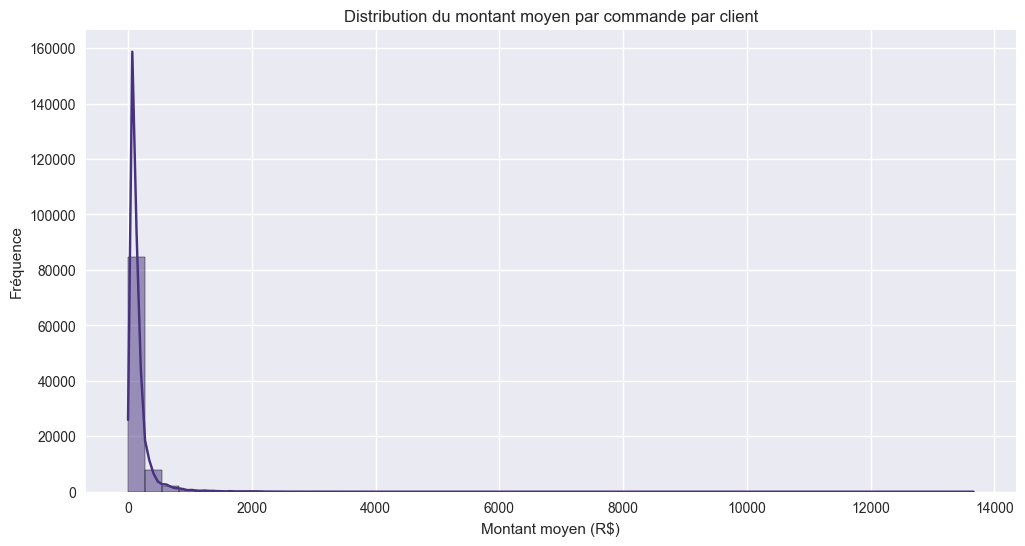

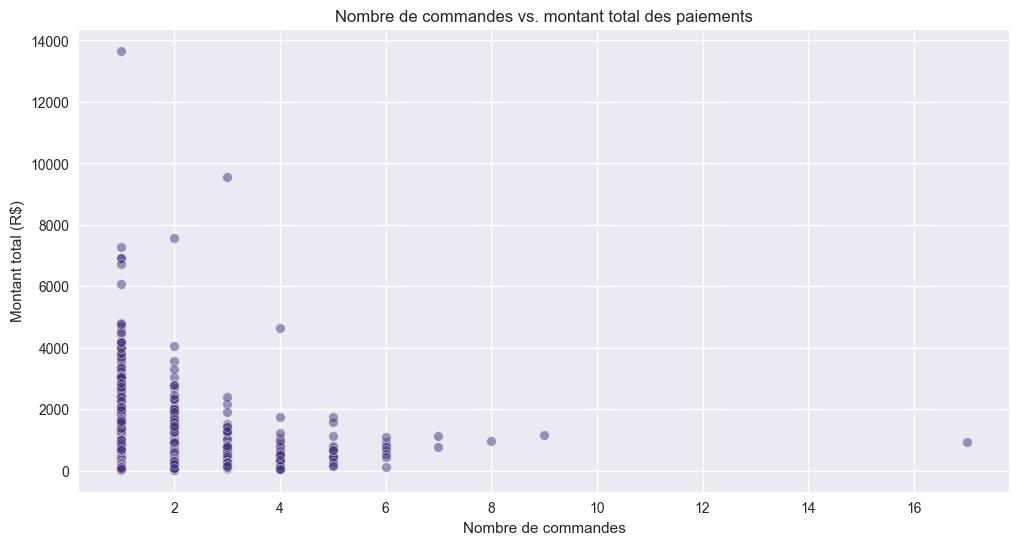

Corrélation entre le nombre de commandes et le montant total: 0.10


In [3]:
# Analyser le montant moyen par commande par client
customer_avg_payment = df.groupby('customer_unique_id')['order_payment_amount'].mean().sort_values(ascending=False)
print(f"Montant moyen par commande par client:")
print(customer_avg_payment.head(10))

plt.figure(figsize=(12, 6))
sns.histplot(customer_avg_payment, kde=True, bins=50)
plt.title('Distribution du montant moyen par commande par client')
plt.xlabel('Montant moyen (R$)')
plt.ylabel('Fréquence')
plt.show()

# Analyser la relation entre le nombre de commandes et le montant total
customer_summary = df.groupby('customer_unique_id').agg({'order_payment_amount': 'sum', 'order_id': 'count'})
customer_summary.rename(columns={'order_id': 'order_count', 'order_payment_amount': 'total_amount'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_summary, x='order_count', y='total_amount', alpha=0.5)
plt.title('Nombre de commandes vs. montant total des paiements')
plt.xlabel('Nombre de commandes')
plt.ylabel('Montant total (R$)')
plt.show()

print(f"Corrélation entre le nombre de commandes et le montant total: {customer_summary['order_count'].corr(customer_summary['total_amount']):.2f}")

Top 10 clients les plus dépensiers:
                                  total_amount  order_count
customer_unique_id                                         
0a0a92112bd4c708ca5fde585afaa872      13664.08            1
46450c74a0d8c5ca9395da1daac6c120       9553.02            3
da122df9eeddfedc1dc1f5349a1a690c       7571.63            2
763c8b1c9c68a0229c42c9fc6f662b93       7274.88            1
dc4802a71eae9be1dd28f5d788ceb526       6929.31            1
459bef486812aa25204be022145caa62       6922.21            1
ff4159b92c40ebe40454e3e6a7c35ed6       6726.66            1
4007669dec559734d6f53e029e360987       6081.54            1
5d0a2980b292d049061542014e8960bf       4809.44            1
eebb5dda148d3893cdaf5b5ca3040ccb       4764.34            1

Top 10 clients avec le plus grand nombre de commandes:
                                  total_amount  order_count
customer_unique_id                                         
8d50f5eadf50201ccdcedfb9e2ac8455        927.63           17
3e43e610

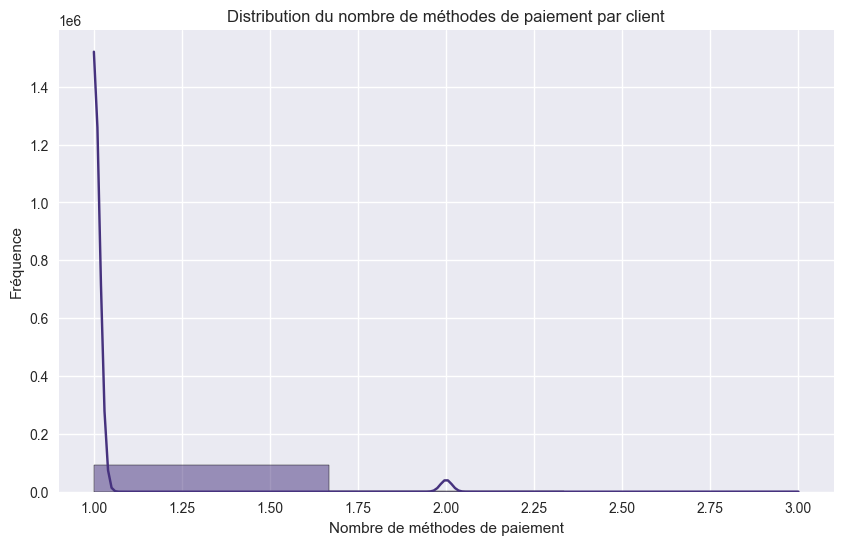

In [4]:
# Analyser les clients les plus dépensiers
print("Top 10 clients les plus dépensiers:")
top_spenders = customer_summary.sort_values('total_amount', ascending=False).head(10)
print(top_spenders)

# Analyser les clients avec le plus grand nombre de commandes
print("\nTop 10 clients avec le plus grand nombre de commandes:")
top_customers = customer_summary.sort_values('order_count', ascending=False).head(10)
print(top_customers)

# Analyser les clients qui ont utilisé plusieurs méthodes de paiement
customer_payment_methods = df.groupby('customer_unique_id')['payment_type'].nunique().sort_values(ascending=False)
print(f"\nNombre de clients ayant utilisé plusieurs méthodes de paiement:")
print(customer_payment_methods.value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(customer_payment_methods, kde=True, bins=customer_payment_methods.max())
plt.title('Distribution du nombre de méthodes de paiement par client')
plt.xlabel('Nombre de méthodes de paiement')
plt.ylabel('Fréquence')
plt.show()

Montant total des paiements par méthode:
payment_type
credit_card    12542084.19
boleto          2869283.54
voucher          379436.87
debit_card       217989.79
Name: order_payment_amount, dtype: float64


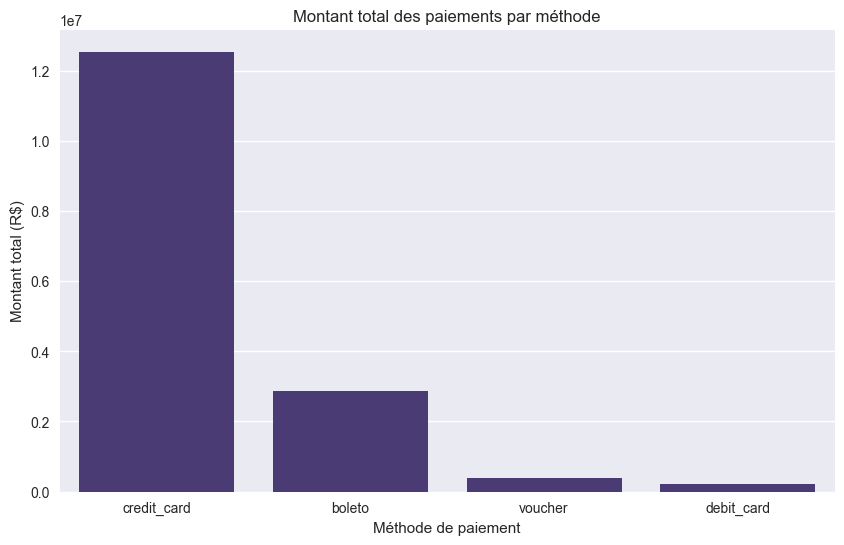


Montant moyen des paiements par méthode:
payment_type
credit_card    163.938098
boleto         145.037838
debit_card     142.663475
voucher         98.071044
Name: order_payment_amount, dtype: float64


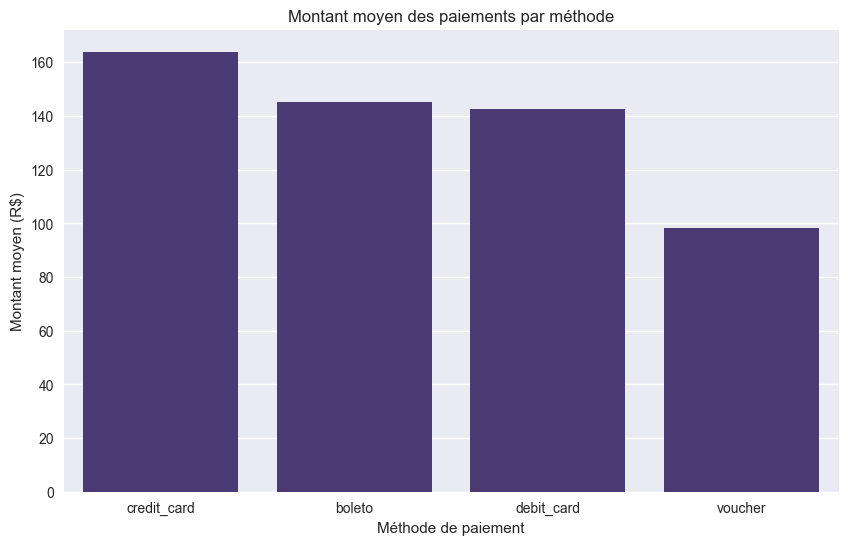

In [5]:
# Analyser le montant total des paiements par méthode
payment_method_total = df.groupby('payment_type')['order_payment_amount'].sum().sort_values(ascending=False)
print(f"Montant total des paiements par méthode:")
print(payment_method_total)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_total.index, y=payment_method_total.values)
plt.title('Montant total des paiements par méthode')
plt.xlabel('Méthode de paiement')
plt.ylabel('Montant total (R$)')
plt.show()

# Analyser le montant moyen par méthode
payment_method_avg = df.groupby('payment_type')['order_payment_amount'].mean().sort_values(ascending=False)
print(f"\nMontant moyen des paiements par méthode:")
print(payment_method_avg)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_avg.index, y=payment_method_avg.values)
plt.title('Montant moyen des paiements par méthode')
plt.xlabel('Méthode de paiement')
plt.ylabel('Montant moyen (R$)')
plt.show()

## Conclusion

L'analyse des détails de paiement des clients révèle plusieurs informations clés:

1. **Méthodes de paiement les plus utilisées**: Le crédit card est la méthode de paiement la plus utilisée, suivie par le boleto, le voucher et le debit card.

2. **Clients les plus dépensiers**: Un petit nombre de clients contribuent significativement au chiffre d'affaires total, avec les 10 clients les plus dépensiers ayant dépensé entre 6,000 et 14,000 R$.

3. **Relation entre le nombre de commandes et le montant total**: Il existe une faible corrélation positive entre le nombre de commandes et le montant total des paiements, ce qui indique que les clients qui commandent plus souvent ne dépensent pas nécessairement plus.

4. **Distribution des montants**: La distribution des montants total des paiements par client est très asymétrique, avec la majorité des clients ayant dépensé moins de 500 R$, mais une queue longue de clients qui ont dépensé beaucoup plus.

5. **Montant moyen par méthode de paiement**: Le montant moyen par paiement est le plus élevé pour les crédit cards et les boletos, et le plus faible pour les vouchers et les debit cards.

Ces informations sont importantes pour comprendre le comportement des clients en matière de paiement et développer des stratégies de marketing et de fidélisation ciblées.